<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj13-appliances-energy-prediction?scriptVersionId=192443073" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Appliances Energy Prediction</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset contains experimental data used to develop regression models for predicting the energy consumption of appliances in a low-energy house. The data was collected over approximately 4.5 months and is intended to be used in creating predictive models that can help optimize energy usage in residential buildings.

#**Import Libraries and Data**
---

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, boxcox
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download loveall/appliances-energy-prediction -f  KAG_energydata_complete.csv
!unzip KAG_energydata_complete.csv.zip














cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory

Dataset URL: https://www.kaggle.com/datasets/loveall/appliances-energy-prediction

License(s): other


  0% 0.00/1.71M [00:00<?, ?B/s]

100% 1.71M/1.71M [00:00<00:00, 128MB/s]

Archive:  KAG_energydata_complete.csv.zip

  inflating: KAG_energydata_complete.csv  


In [6]:
data = pd.read_csv("KAG_energydata_complete.csv").copy()

# **Take a look at the data**
---

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 19735 entries, 0 to 19734

Data columns (total 29 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   date         19735 non-null  object 

 1   Appliances   19735 non-null  int64  

 2   lights       19735 non-null  int64  

 3   T1           19735 non-null  float64

 4   RH_1         19735 non-null  float64

 5   T2           19735 non-null  float64

 6   RH_2         19735 non-null  float64

 7   T3           19735 non-null  float64

 8   RH_3         19735 non-null  float64

 9   T4           19735 non-null  float64

 10  RH_4         19735 non-null  float64

 11  T5           19735 non-null  float64

 12  RH_5         19735 non-null  float64

 13  T6           19735 non-null  float64

 14  RH_6         19735 non-null  float64

 15  T7           19735 non-null  float64

 16  RH_7         19735 non-null  float64

 17  T8           19735 non-null  float64

 18  RH_8         19735 non-

In [ ]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
data.select_dtypes(include=['object']).describe()

,date
count,19735
unique,19735
top,2016-01-11 17:00:00
freq,1


In [ ]:
data['Appliances'].describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [ ]:
data.shape

(19735, 29)

# **Exploratory Data Analysis**
---

**Univariate Analysis**

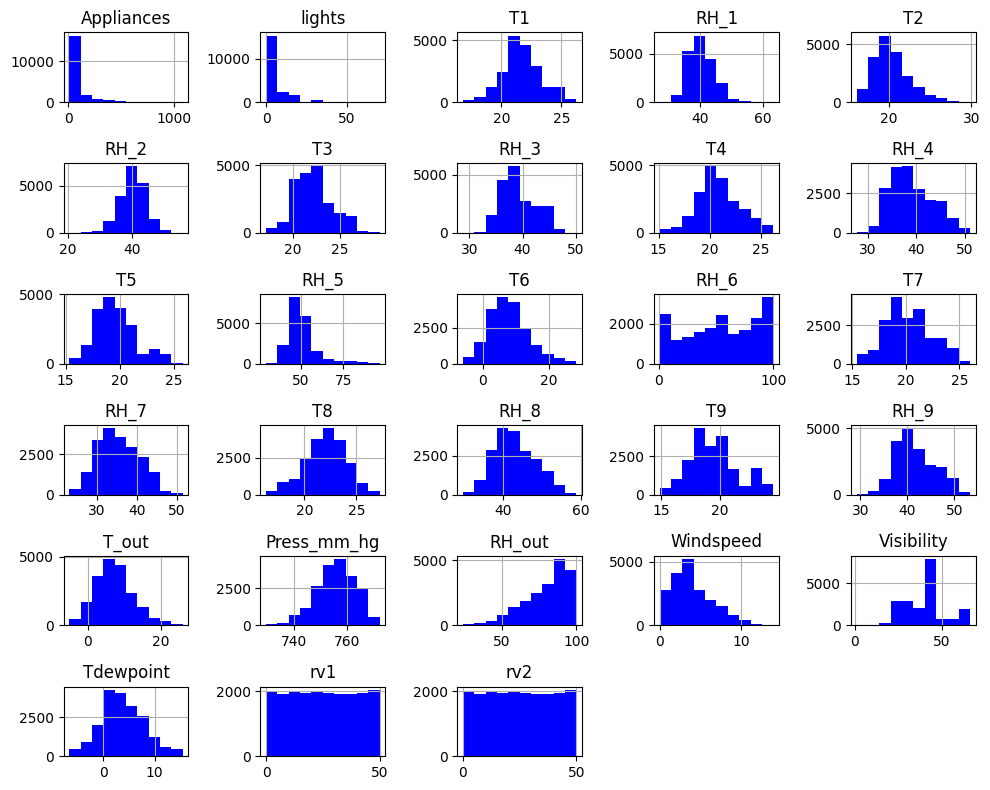

In [ ]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

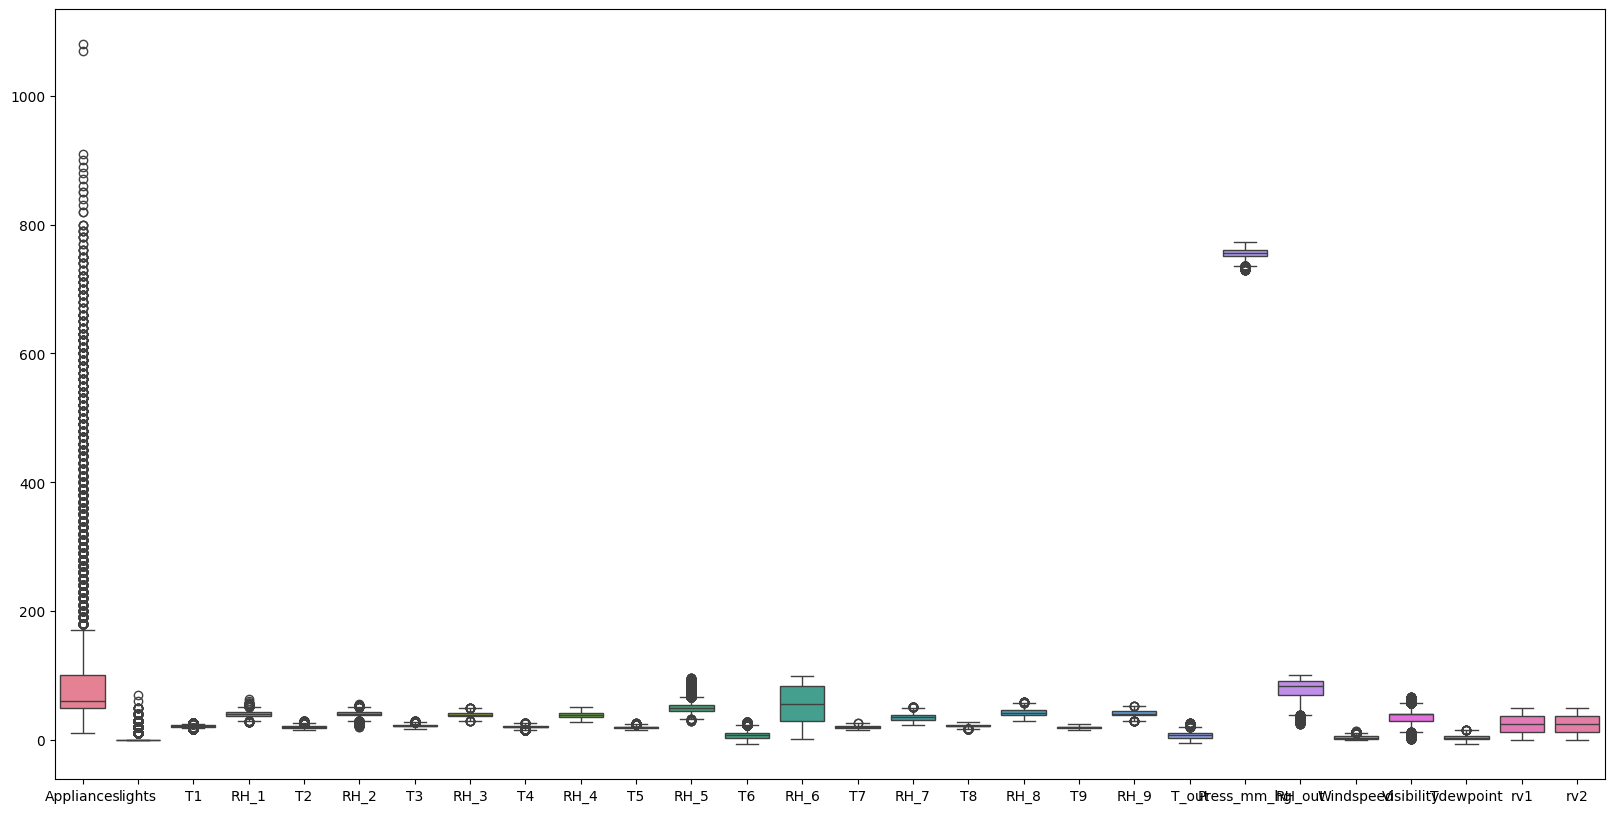

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(numerical_data)
plt.show()

**Multivariate Analysis**

In [ ]:
#sns.pairplot(data.select_dtypes(include='number'),corner = True)
plt.show()

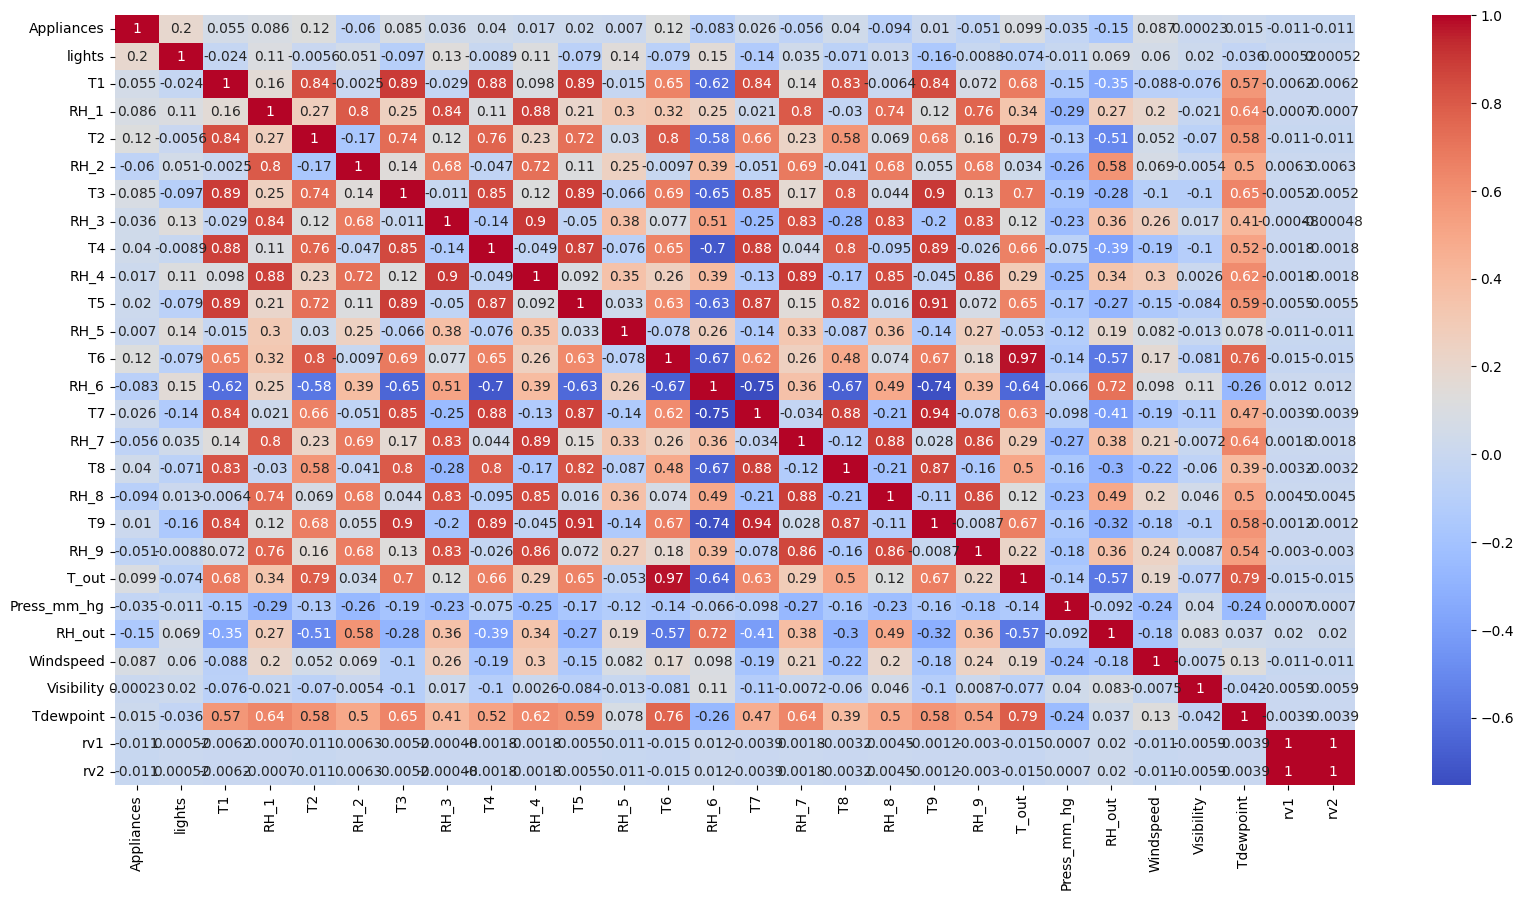

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

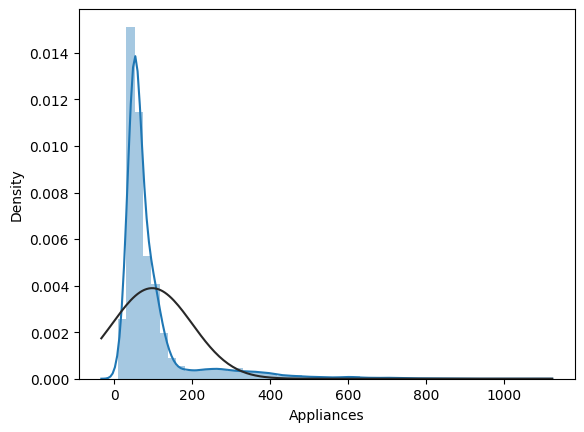

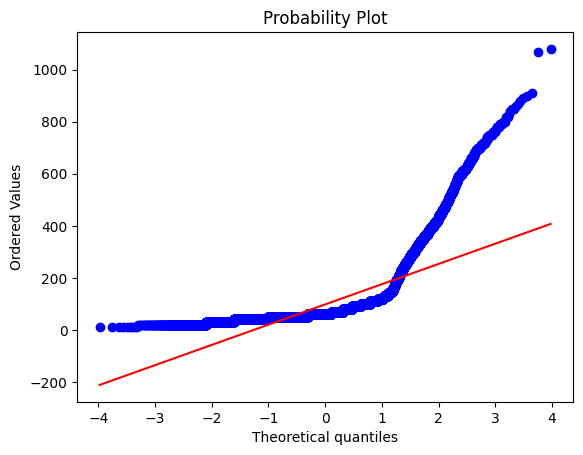

In [ ]:
sns.distplot(data['Appliances'],fit = stats.norm)
fig = plt.figure()
res = stats.probplot(data['Appliances'], plot=plt)

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [ ]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
date,0,0.0
T7,0,0.0
rv1,0,0.0
Tdewpoint,0,0.0
Visibility,0,0.0
Windspeed,0,0.0
RH_out,0,0.0
Press_mm_hg,0,0.0
T_out,0,0.0
RH_9,0,0.0


In [ ]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Categorical Variables**

In [7]:
data.drop(['date'], axis = 1, inplace = True)

**Skewness Handling**

In [8]:
data['Appliances']=np.log1p(data['Appliances'])

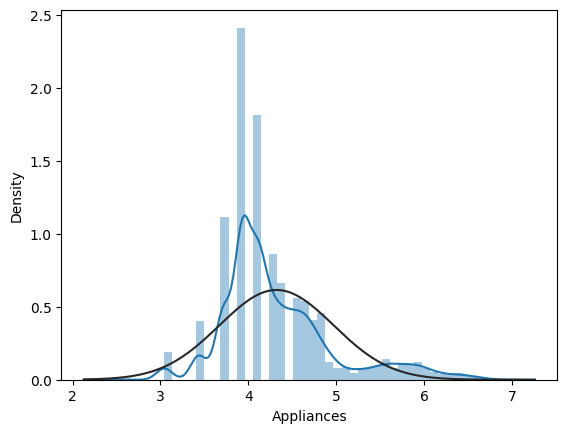

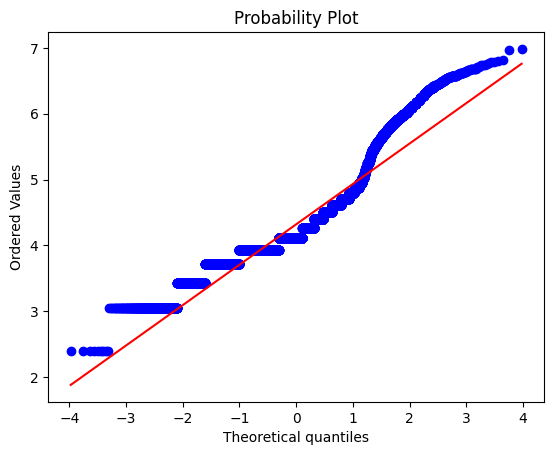

In [9]:
sns.distplot(data['Appliances'],fit = stats.norm)
fig = plt.figure()
res = stats.probplot(data['Appliances'], plot=plt)

In [ ]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


**Data splitting**

In [10]:
X = data.drop(['Appliances'], axis = 1)
y = data['Appliances']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state = 11)
xtest, xval, ytest, yval = train_test_split(X, y, test_size = 0.50, random_state = 11)

**Dealing with Outliers**

In [11]:
Q1 = xtrain.quantile(0.25)
Q3 = xtrain.quantile(0.75)
IQR = Q3 - Q1
outliers = xtrain[((xtrain < (Q1 - 1.5 * IQR)) | (xtrain > (Q3 + 1.5 * IQR))).any(axis=1)]
xtrain.drop(outliers.index,inplace=True)
ytrain.drop(outliers.index,inplace=True)

**Data Normalization**

In [12]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
xval = scaler.transform(xval)

# **Modeling**
------

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [30]:
model = Sequential([
    Input(shape = xtrain.shape[1:]),
    Dense(192,activation='relu'),
    Dropout(.4),
    Dense(160,activation='relu'),
    Dense(224,activation='relu'),
    Dropout(0.4),
    Dense(256,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='linear'),
])

In [31]:
model.compile(optimizer='Nadam',loss='Huber',metrics=[tf.keras.metrics.R2Score()])

In [32]:
history = model.fit(xtrain,ytrain,epochs=100,validation_data=[xval,yval],batch_size=20)

Epoch 1/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.7164 - r2_score: -6.3706 - val_loss: 0.8303 - val_r2_score: -8.7674

Epoch 2/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1646 - r2_score: -0.0322 - val_loss: 0.2861 - val_r2_score: -0.5899

Epoch 3/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1264 - r2_score: 0.1863 - val_loss: 0.1648 - val_r2_score: 0.1125

Epoch 4/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1240 - r2_score: 0.2328 - val_loss: 0.1610 - val_r2_score: 0.1234

Epoch 5/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1187 - r2_score: 0.2701 - val_loss: 0.1835 - val_r2_score: -0.0193

Epoch 6/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1204 - r2_score: 0.2710 - val_loss: 0.1499 - val_r2_score: 0.1921

Epoch 7/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1107 - r2_score: 0.3132 - val_loss: 0.1925 - val_r2_score: -0.0830

Epoch 8/100

399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1082 - r2_s

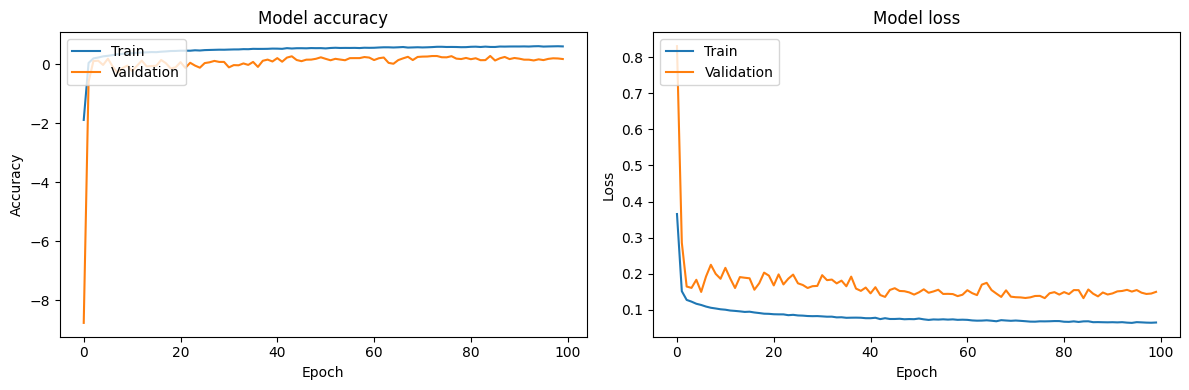

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
model.evaluate(xtest,ytest)

309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1422 - r2_score: 0.2028


[0.14323844015598297, 0.20809519290924072]